In [2]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("..") 
import src 
from src.plots.plots.utils import dummy_background_axes

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)
../src/plots/env.py:42: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]


/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


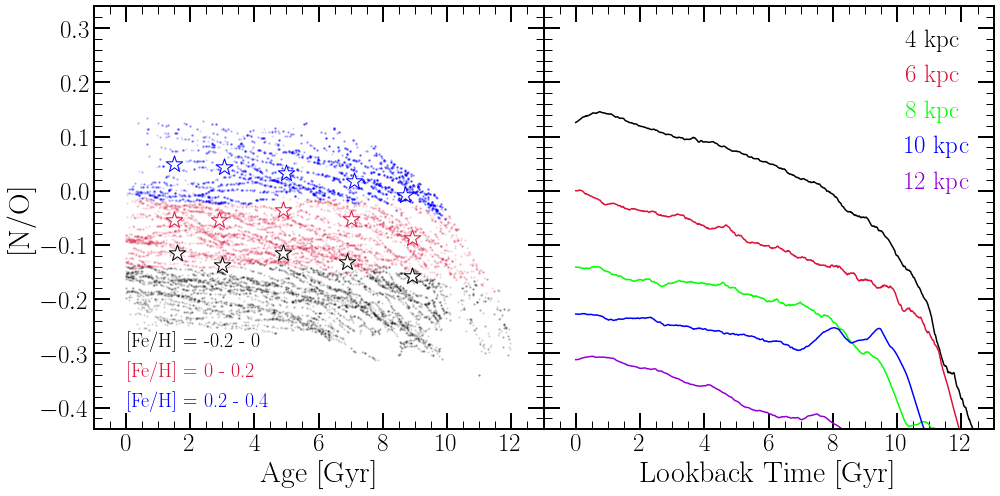

In [3]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122, sharey = ax1) 
for ax in [ax1, ax2]: 
    ax.set_xlim([-1, 13]) 
    ax.set_xticks(range(0, 14, 2)) 
ax1.set_xlabel("Age [Gyr]") 
ax2.set_xlabel("Lookback Time [Gyr]") 
ax1.set_ylabel("[N/O]") 
ax1.set_ylim([-0.44, 0.34]) 
plt.setp(ax2.get_yticklabels(), visible = False) 


out = vice.output("../outputs/diffusion/insideout_3xcristallo") 
feh_bins = [[-0.2, 0.0], [0.0, 0.2], [0.2, 0.4]] 
age_bins = [[0, 2], [2, 4], [4, 6], [6, 8], [8, 10]] 
colors = ["black", "crimson", "blue"] 
stars = out.stars.filter(
    "zone_final", ">=", 70).filter(
    "zone_final", "<=", 90) 


for i in range(len(feh_bins)): 
    sub = stars.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    norm = sub(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    feh = [sub["[fe/h]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[Fe/H] = %g - %g" % (feh_bins[i][0], feh_bins[i][1]), 
        "alpha": 0.1 
    } 
    ax1.scatter(ages, no, **kwargs) 
leg1 = ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20) 
for i in range(len(feh_bins)): 
    leg1.get_texts()[i].set_color(colors[i]) 
    leg1.legendHandles[i].set_visible(False) 
    

v21 = src.data.read("vincenzo2021") 
for i in range(len(feh_bins)): 
    sub_ = v21.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    for j in range(len(age_bins)): 
        sub = sub_.filter("age", ">=", age_bins[j][0]).filter("age", "<=", age_bins[j][1]) 
        age = np.median(sub["age"]) 
        no = np.median(sub["[n/o]"])
#         age_errbar = [[age - age_bins[j][0]], [age_bins[j][1] - age]] 
#         no_errbar = np.std(sub["[n/o]"]) 
#         kwargs = {
#             "color": plots.mpltoolkit.named_colors()[colors[i]], 
#             "marker": plots.mpltoolkit.markers()["star"], 
#             "markerfacecolor": plots.mpltoolkit.named_colors()["white"], 
#             "markeredgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
#             "markersize": 20 
#         }
#         ax1.errorbar(age, no, xerr = age_errbar, yerr = no_errbar, **kwargs)
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 300
        } 
        ax1.scatter(age, no, **kwargs) 


zones = ["zone40", "zone60", "zone80", "zone100", "zone120"] 
labels = ["4 kpc", "6 kpc", "8 kpc", "10 kpc", "12 kpc"] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
for i in range(len(zones)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i] 
    } 
    ax2.plot(out.zones[zones[i]].history["lookback"], 
        out.zones[zones[i]].history["[n/o]"], **kwargs) 
leg2 = ax2.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0) 
for i in range(len(zones)): 
    leg2.get_texts()[i].set_color(colors[i]) 
    leg2.legendHandles[i].set_visible(False) 


plt.tight_layout() 
plt.subplots_adjust(wspace = 0) 

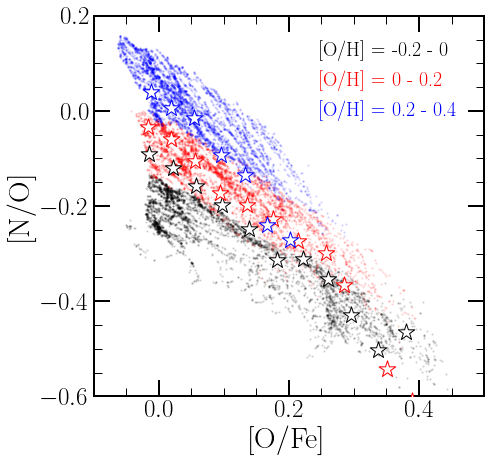

In [8]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/Fe]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.1, 0.5]) 
ax.set_ylim([-0.6, 0.2]) 
oh_bins = [[-0.2, 0.0], [0.0, 0.2], [0.2, 0.4]] 
ofe_bins = [[0.04 * (i - 1), 0.04 * i] for i in range(11)] 
colors = ["black", "red", "blue"] 
out = vice.output("../outputs/diffusion/insideout_3xcristallo") 
stars = out.stars.filter(
    "zone_final", ">=", 20).filter(
    "zone_final", "<=", 154) 

v21 = src.data.read("vincenzo2021") 
v21["[o/fe]"] = [a - b for a, b in zip(v21["[o/h]"], v21["[fe/h]"])] 

for i in range(len(oh_bins)): 
    sub = stars.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    norm = sum(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    ofe = [sub["[o/fe]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[O/H] = %g - %g" % (oh_bins[i][0], oh_bins[i][1]), 
        "alpha": 0.1 
    } 
    ax.scatter(ofe, no, **kwargs) 
    sub_ = v21.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    for j in range(len(ofe_bins)): 
        sub = sub_.filter("[o/fe]", ">=", ofe_bins[j][0]).filter("[o/fe]", "<=", ofe_bins[j][1]) 
        ofe = np.median(sub["[o/fe]"]) 
        no = np.median(sub["[n/o]"]) 
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 300, 
            "zorder": 100 
        } 
        ax.scatter(ofe, no, **kwargs) 
    
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20, bbox_to_anchor = (0.98, 0.98)) 
for i in range(len(feh_bins)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


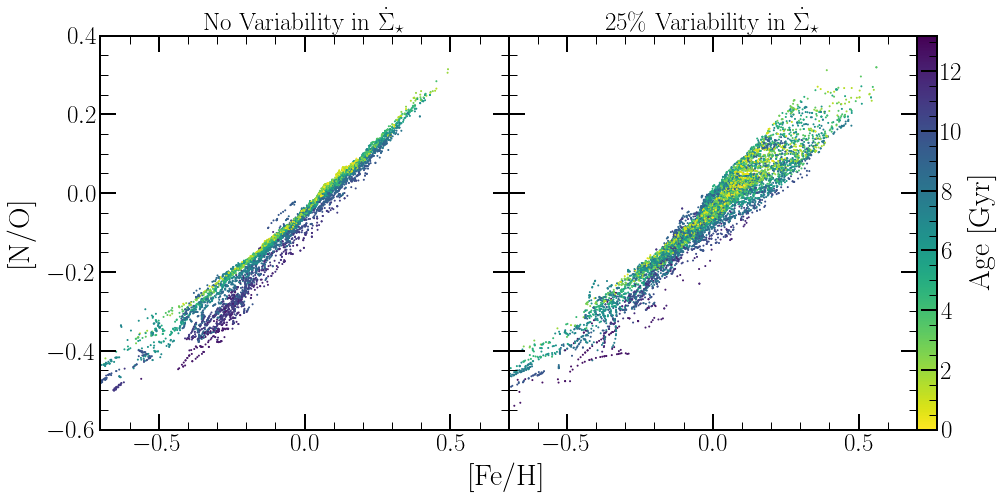

In [56]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
for ax in [ax1, ax2]: 
    ax.set_xlim([-0.7, 0.7]) 
    ax.set_ylim([-0.6, 0.4]) 
dummy = dummy_background_axes([[ax1, ax2]]) 
dummy.set_xlabel("[Fe/H]", labelpad = 30) 
dummy.set_ylabel("[N/O]", labelpad = 60) 
plt.setp(ax2.get_yticklabels(), visible = False) 
ax1.set_title(r"No Variability in $\dot{\Sigma}_\star$", fontsize = 25) 
ax2.set_title(r"25\% Variability in $\dot{\Sigma}_\star$", fontsize = 25) 

insideout = vice.output("../outputs/diffusion/insideout") 
modulated = vice.output("../outputs/diffusion/modulated")
io_stars = insideout.stars.filter(
    "zone_final", ">=", 70).filter(
    "zone_final", "<=", 89) 
m_stars = modulated.stars.filter(
    "zone_final", ">=", 70).filter(
    "zone_final", "<=", 89) 
# io_stars = insideout.stars.filter(
#     "zone_final", ">=", 20).filter(
#     "zone_final", "<=", 154) 
# m_stars = modulated.stars.filter(
#     "zone_final", ">=", 20).filter(
#     "zone_final", "<=", 154) 

for i in range(2): 
    stars = [io_stars, m_stars][i] 
    ax = [ax1, ax2][i] 
    norm = sum(stars["mass"])
    mass_fracs = [_ / norm for _ in stars["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 10000, p = mass_fracs) 
    ages = [stars["age"][index] for index in indeces] 
    feh = [stars["[fe/h]"][index] for index in indeces] 
    no = [stars["[n/o]"][index] for index in indeces] 
    kwargs = {
        "c": ages, 
        "vmin": 0, 
        "vmax": 13.2, 
        "s": 1, 
        "rasterized": True, 
        "cmap": plt.get_cmap("viridis_r") 
    } 
    sc = ax.scatter(feh, no, **kwargs) 
    
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95]) 
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical") 
cbar.set_label("Age [Gyr]") 
plt.tight_layout() 
plt.subplots_adjust(wspace = 0, right = 0.91, left = 0.10, bottom = 0.14) 
cbar_ax.set_position([
    ax2.get_position().x1, 
    ax2.get_position().y0, 
    0.02, 
    ax2.get_position().y1 - ax2.get_position().y0 
]) 
for ext in ["pdf", "png"]: plt.savefig("no_feh_sfhcomp.%s" % (ext)) 